In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [3]:
target = x * np.sin(np.cos(x * 3))
target

array([ 8.36021862e-01,  7.07266523e-01,  5.37888772e-01,  3.38570924e-01,
        1.35151445e-01, -3.53391123e-02, -1.41791947e-01, -1.74703418e-01,
       -1.46955095e-01, -8.16508053e-02, -1.86844092e-16,  8.16508053e-02,
        1.46955095e-01,  1.74703418e-01,  1.41791947e-01,  3.53391123e-02,
       -1.35151445e-01, -3.38570924e-01, -5.37888772e-01, -7.07266523e-01])

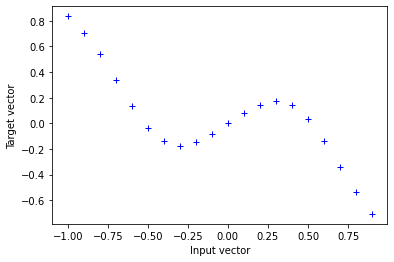

In [4]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, target, 'b+')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [5]:
x1 = np.arange(-3, 3, 0.1)
# RBF function (radial basis transfer)
def rbf(x):
    return np.exp(-x ** 2)

a = rbf(x1)


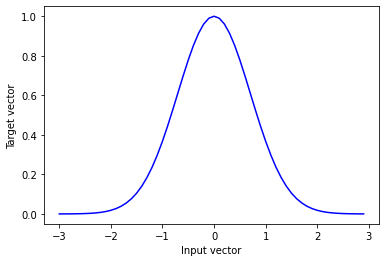

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, a, 'b')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [7]:
a1 = rbf(x1)
a2 = rbf(x1 - 1.5)
a3 = .5 * rbf(x1 + 2)
a4 = a1 + a2 + a3

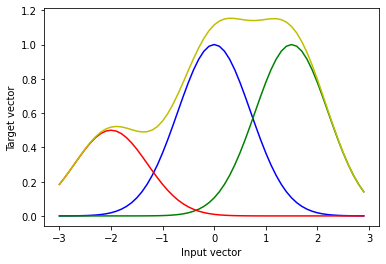

In [8]:
# plot rbf_1 to rbf_4 in a plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, a1, 'b')
ax.plot(x1, a2, 'g')
ax.plot(x1, a3, 'r')
ax.plot(x1, a4, 'y')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [9]:
# Design a RBF network
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(8,), activation='logistic',
                     solver='lbfgs', alpha=0.0001, batch_size='auto',
                        learning_rate='constant', learning_rate_init=0.001,
                        power_t=0.5, max_iter=5000, shuffle=True,
                        random_state=None, tol=0.0001, verbose=False,
                        warm_start=False, momentum=0.9, nesterovs_momentum=True,
                        early_stopping=False, validation_fraction=0.1,
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [10]:
x = np.arange(-1, 1, 0.1)
mask = np.random.rand(len(x)) < 0.8
x_train = x[mask]
x_test = x[~mask]
target = x * np.sin(np.cos(x * 3))
# fit
model.fit(x_train.reshape(-1, 1), target[mask])
y_hat = model.predict(x_test.reshape(-1, 1))

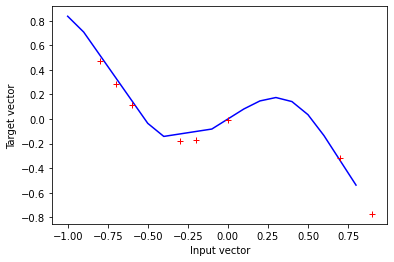

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot train data
ax.plot(x_train, target[mask], 'b')
# plot test data
ax.plot(x_test, y_hat, 'r+')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

In [12]:
# check network performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# MSE
mse = mean_squared_error(target[~mask], y_hat)
# R2
r2 = r2_score(target[~mask], y_hat)

print('MSE: %.8f' % mse)
print('R2: %.8f' % r2)

MSE: 0.00154162
R2: 0.98850996


### Plotting the RBF

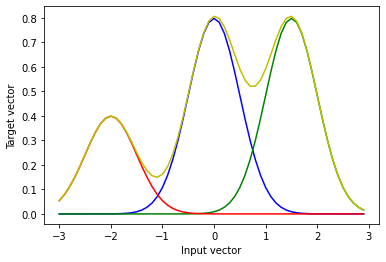

In [13]:
from scipy.stats import norm

x = np.arange(-3, 3, 0.1)
y = norm(0, .5)

a1 = y.pdf(x)
a2 = y.pdf(x - 1.5)
a3 = .5 * y.pdf(x + 2)
a4 = a1 + a2 + a3

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, a1, 'b')
ax.plot(x, a2, 'g')
ax.plot(x, a3, 'r')
ax.plot(x, a4, 'y')
ax.set_xlabel('Input vector')
ax.set_ylabel('Target vector')
plt.show()

### RBF Curve fitting using Gaussian kernels

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor

x = np.arange(-1, 1, 0.1)
x = x.reshape(-1, 1)

y = np.array([x * np.sin(np.cos(x * 3))])
y = y.reshape(-1, 1)

In [15]:
model = GaussianProcessRegressor()

clf = model.fit(x, y)
y_ = clf.predict(x)

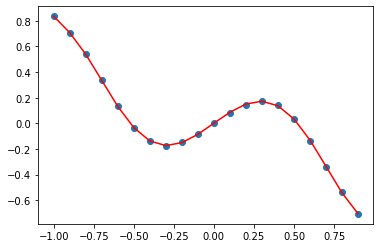

In [16]:
plt.scatter(x, y)
plt.plot(x, y_, 'r')

### RBF Curve (writing the model)

In [17]:
from scipy.linalg import norm, pinv
from scipy import mgrid, random

class RBF:
    def __init__(self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        
        #initialize the center corresponding to the hidden neuron of RBF.
        #There are two important parameters that define the RBF network.
        #The first parameter represents β, the second represents the connection weight.
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]  
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))  
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return np.exp(-self.beta * norm(c-d)**2)  
       
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = np.zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
        
    def train(self, X, Y): 
        #Pass x and y values for training
        # X: matrix of dimensions (n x indim)
        # y: column vector of dimension (n x 1) 

        # init center vectors from training set randomly
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]  

        G = self._calcAct(X)  
           
        # calculate output weights (pseudoinverse)  
        self.W = np.dot(pinv(G), Y)  
           
    def test(self, X):  
        # X: matrix of dimensions (n x indim)
           
        G = self._calcAct(X)  
        Y = np.dot(G, self.W)  
        return Y

###### plot

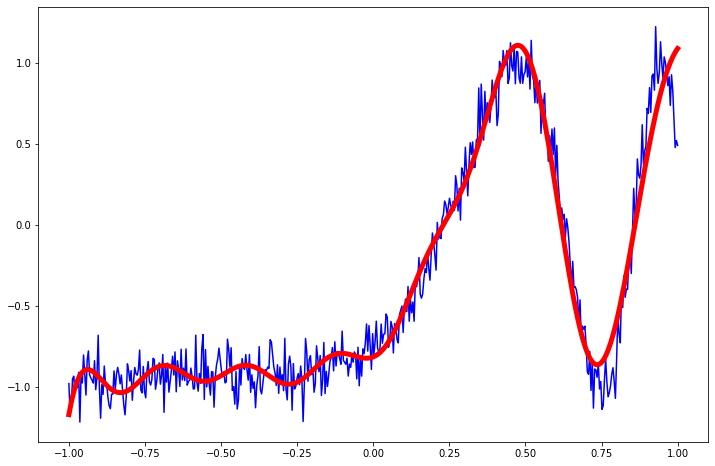

In [18]:
x = mgrid[-1:1:complex(0,500)].reshape(500, 1)

y = np.sin(3*(x+0.5)**3 - 1.2)
y += random.normal(0, 0.1, y.shape)

# rbf regression
rbf = RBF(1, 15, 1)
rbf.train(x, y)
z = rbf.test(x)

# plot original data and learned model
plt.figure(figsize=(12, 8));
plt.plot(x, y, 'b-');
plt.plot(x, z, 'r-', linewidth=5);

### RBF with Kmeans (manual)

In [19]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [20]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
                
                print('epoch: ',epoch+1, ' sample #: ', i+1, ', Loss: {0:.4f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [21]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

In [22]:

# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)

noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * (X))  + noise

rbfnet = RBFNet(lr=1e-2, k=2, epochs = 50, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)

epoch:  1  sample #:  1 , Loss: 0.0455
epoch:  1  sample #:  2 , Loss: 0.2536
epoch:  1  sample #:  3 , Loss: 0.4044
epoch:  1  sample #:  4 , Loss: 0.4549
epoch:  1  sample #:  5 , Loss: 0.6822
epoch:  1  sample #:  6 , Loss: 0.6913
epoch:  1  sample #:  7 , Loss: 0.7333
epoch:  1  sample #:  8 , Loss: 1.2631
epoch:  1  sample #:  9 , Loss: 1.3283
epoch:  1  sample #:  10 , Loss: 1.4630
epoch:  1  sample #:  11 , Loss: 1.5586
epoch:  1  sample #:  12 , Loss: 2.0270
epoch:  1  sample #:  13 , Loss: 2.6049
epoch:  1  sample #:  14 , Loss: 3.3926
epoch:  1  sample #:  15 , Loss: 3.7946
epoch:  1  sample #:  16 , Loss: 3.7254
epoch:  1  sample #:  17 , Loss: 4.4226
epoch:  1  sample #:  18 , Loss: 4.6168
epoch:  1  sample #:  19 , Loss: 4.0628
epoch:  1  sample #:  20 , Loss: 4.8773
epoch:  1  sample #:  21 , Loss: 4.1042
epoch:  1  sample #:  22 , Loss: 3.8170
epoch:  1  sample #:  23 , Loss: 3.7330
epoch:  1  sample #:  24 , Loss: 3.6562
epoch:  1  sample #:  25 , Loss: 3.8840
epoch:  1

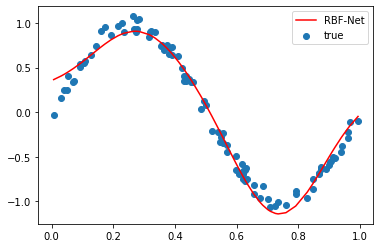

In [23]:
plt.scatter(X, y, label='true')
plt.plot(X, y_pred, '-r', label='RBF-Net')
plt.legend()
plt.show()

### RBF Curve fitting performance and measurements

In [24]:
from scipy.interpolate import Rbf
import seaborn as sns

In [25]:
class newrb:
    def __init__(self, X, T, hidden_shape=8, sigma=1.0):

        # number of hidden neurons
        self.hidden_shape = hidden_shape
        
        # sigma for the rbf function
        self.sigma = sigma

        # the rbf model centers
        self.centers = None

        # allocate space for saving model weights
        self.weights = None

        # fit the model immidealty to update the weights and be able to predict new data
        self.fit(X, T)


    # the rbf function which uses the random center and the predefined sigma
    # to calculate the output
    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    # for each center calculate the kernel
    def _calculate_interpolation_matrix(self, x):
        matrix = np.zeros((len(x), self.hidden_shape))
        for data_point_arg, data_point in enumerate(x):
            for center_arg, center in enumerate(self.centers):
                matrix[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return matrix

    # select the centers randomly using numpy choice
    def _select_centers(self, y):
        random_args = np.random.choice(len(y), self.hidden_shape)
        centers = y[random_args]
        return centers

    # functions that fits the model to the data
    # by calculating the intepolation matrix
    # and then computing the weights using the pseudo inverse
    def fit(self, x, y):
        self.centers = self._select_centers(x)
        matrix = self._calculate_interpolation_matrix(x)
        self.weights = np.dot(np.linalg.pinv(matrix), y)

    # predict new data
    def predict(self, x):
        matrix = self._calculate_interpolation_matrix(x)
        predictions = np.dot(matrix, self.weights)
        return predictions

In [26]:
def netPeformance(T, Y):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # plot the targest and the predictions
    axs[0, 0].plot(T, 'b')
    axs[0, 0].plot(Y, '-.r')
    axs[0, 0].legend(['Targets','Network outputs'])
    axs[0, 0].set_title('Targets data vs Network outputs')
    axs[0, 0].set_xlabel('sample number')
    axs[0, 0].set_ylabel('data')
    axs[0, 0].grid(linewidth=1)

    # plot the network outputs vs the targets
    line_data1 = np.minimum(T.flatten(), Y.flatten())
    line_data2 = np.maximum(T.flatten(), Y.flatten())
    axs[1, 0].plot(line_data1, line_data2, 'b')
    axs[1, 0].plot(T, Y, 'ko')
    axs[1, 0].legend(['Targets','Network outputs'])

    # calculate target and prediction correlation to see their similarity
    corr = f"R: {np.mean(np.corrcoef(T.reshape(1, -1), Y.flatten())):.3f}"
    axs[1, 0].set_title(corr)
    axs[1, 0].set_xlabel('target values')
    axs[1, 0].set_ylabel('network outputs')
    axs[1, 0].grid(linewidth=1)

    # calculate absolute error value
    errorAbsValue = T - Y
    errorMean = np.mean(errorAbsValue)
    errorStd = np.std(errorAbsValue)

    axs[0, 1].plot(errorAbsValue, 'b')
    axs[0, 1].set_title(f"RMSE: {np.sqrt(np.mean(np.square(errorAbsValue)))}")
    axs[0, 1].set_xlabel('sample number')
    axs[0, 1].set_ylabel('absolute error')
    axs[0, 1].grid(linewidth=1)

    #hist
    axs[1, 1].hist(errorAbsValue, density=True)
    axs[1, 1].set_title(f"mean: {errorMean:.7f}, std: {errorStd:.5f}")
    axs[1, 1].set_xlabel('Frequency')
    axs[1, 1].set_ylabel('error')
    axs[1, 1].grid(linewidth=1)

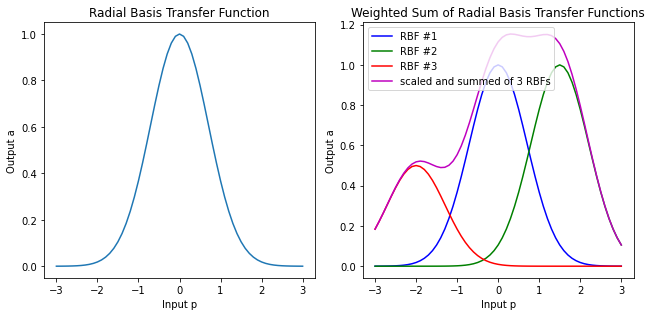

In [27]:
# define the radbas function
def radbas(arr):
    return np.exp(-arr ** 2)

# create the array given the steps
x = np.linspace(start=-3, stop=3, num=61, retstep=False)
a = radbas(x)

# create diffenet summations of the rbf function
a1 = radbas(x)
a2 = radbas(x - 1.5)
a3 = 0.5 * radbas(x + 2)
a4 = a1 + a2 + a3

# Get perception on the RBF function and how a summation of different kernels affects data
fig, axs = plt.subplots(1, 2, figsize=(9, 4.5))

axs[0].plot(x, a)
axs[0].set_title('Radial Basis Transfer Function')
axs[0].set_xlabel('Input p')
axs[0].set_ylabel('Output a')

axs[1].plot(x, a1, 'b-', x, a2, 'g-', x, a3, 'r-', x, a4, 'm-')
axs[1].set_title('Weighted Sum of Radial Basis Transfer Functions');
axs[1].set_xlabel('Input p');
axs[1].set_ylabel('Output a');
axs[1].legend(['RBF #1','RBF #2','RBF #3','scaled and summed of 3 RBFs'])

fig.tight_layout()

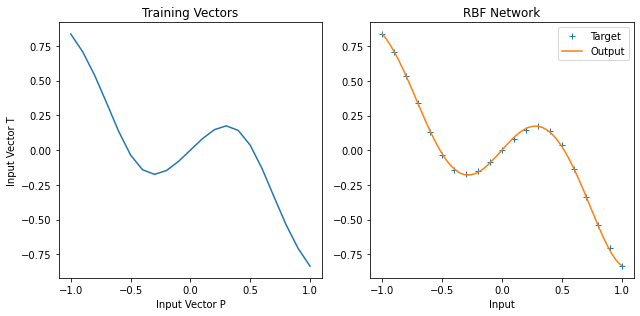

In [28]:
# RBF Learning demo
# data preperation
X = np.linspace(start=-1, stop=1, num=21, retstep=False)
T = X * np.sin(np.cos(3 * X))

# RBF training
goal = 0.001   # set the mse goal
spread = 1     # model spread
MN = 8         # number of neurons (RBFs)
net = newrb(X, T, hidden_shape=8, sigma=spread)

# RBF validation
X_test = np.linspace(start=-1, stop=1, num=201, retstep=False)
Y_hat = net.predict(X_test)

# visualize the results
fig, axs = plt.subplots(1, 2, figsize=(9, 4.5))

# plot the targets and the predictions
axs[0].plot(X, T)
axs[0].set_title("Training Vectors")
axs[0].set_xlabel('Input Vector P')
axs[0].set_ylabel('Input Vector T')

axs[1].plot(X, T, '+')
axs[1].set_xlabel('Input')
axs[1].plot(X_test, Y_hat)
axs[1].legend(['Target', 'Output'])
axs[1].set_title('RBF Network')
fig.tight_layout()

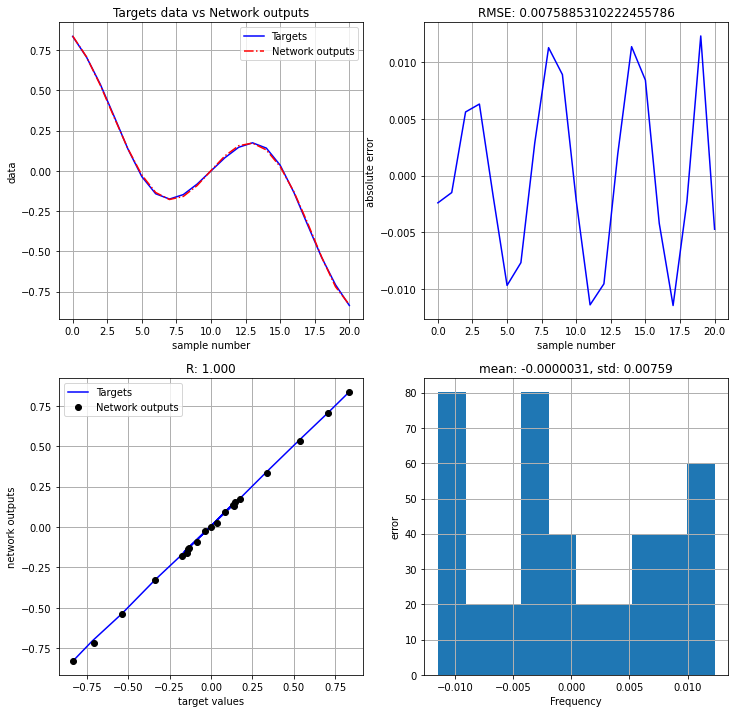

In [29]:
# validate the network
netPeformance(T, net.predict(X))

### RBF XOR

In [30]:
import tensorflow as tf

In [31]:
# create centers given two dimensional peaks
# Peak generator
class CustomPeaks(tf.keras.initializers.Initializer):
    def __init__(self, mu1, mu2):
        # save the centers
        self.mu1 = mu1
        self.mu2 = mu2
        super().__init__()
    
    def __call__(self, shape, dtype=None):
        # combine and return centers as float
        outs = np.c_[self.mu1, self.mu2]
        return tf.convert_to_tensor(outs, dtype="float")

# select the centers randomly
class InitCentersRandom(tf.keras.initializers.Initializer):
    """ tf.keras.initializers.Initializer for initialization of centers of RBF network
        as random samples from the given data set.

    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X
        super().__init__()

    def __call__(self, shape, dtype=None):
        assert shape[1:] == self.X.shape[1:]  # check dimension

        # np.random.randint returns ints from [low, high) !
        idx = np.random.randint(self.X.shape[0], size=shape[0])

        return self.X[idx, :]


# rbf layer definition
class RBFLayer(tf.keras.layers.Layer):
    """ Layer of Gaussian RBF units.

    # Example

    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```


    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas

    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):

        self.output_dim = output_dim

        # betas is either initializer object or float
        if isinstance(betas, tf.keras.initializers.Initializer):
            self.betas_initializer = betas
        else:
            self.betas_initializer = tf.keras.initializers.Constant(value=betas)

        # of there is no initializer use the RandomUniform function
        self.initializer = initializer if initializer else tf.keras.initializers.RandomUniform(
            0.0, 1.0)

        super().__init__(**kwargs)

    # builds the layer 
    def build(self, input_shape):

        # add the center and bias weights using inits
        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=False)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=self.betas_initializer,
                                     # initializer='ones',
                                     trainable=False)

        super().build(input_shape)

    # this is called when the RBF layer is used on data
    def call(self, x):

        C = tf.expand_dims(self.centers, -1)  # inserts a dimension of 1
        H = tf.transpose(C-tf.transpose(x))  # matrix of differences
        return tf.exp(-self.betas * tf.math.reduce_sum(H**2, axis=1))

    # calculate outputshape based on input shape
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    # have to define get_config to be able to use model_from_json
    def get_config(self):
        config = {
            'output_dim': self.output_dim
        }
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [32]:
def get_model():
    # seq model
    model = tf.keras.models.Sequential()
    model.add(rbflayer)
    # classification layer
    model.add(tf.keras.layers.Dense(units=1, activation='relu', kernel_initializer="he_normal", name="Final_dense"))
    # compile with mse loss and sgd optimizer
    model.compile(optimizer='sgd', loss='mean_squared_error')
    model.summary()
    return model

In [33]:
# XOR DATA
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
X = np.c_[x1, x2]
X = X.astype("float") # convert type to float for tensorflow

# create labels
T = np.array([0, 1, 1, 0])
T = T.astype("float")

print(X.shape)
print(T.shape)

(4, 2)
(4,)


In [34]:
# Create RBF using tensorflow***

# centers initiation for 2 neurons
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])

# create the rbf layer from the class we created above
rbflayer = RBFLayer(2, initializer=CustomPeaks(mu1, mu2), betas=1, input_shape=(2,), name="RFB_layer")

# see network params
net = get_model()

2021-11-07 19:17:44.152452: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-07 19:17:44.152499: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (smbh): /proc/driver/nvidia/version does not exist
2021-11-07 19:17:44.155608: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
RFB_layer (RBFLayer)         (None, 2)                 6         
_________________________________________________________________
Final_dense (Dense)          (None, 1)                 3         
Total params: 9
Trainable params: 3
Non-trainable params: 6
_________________________________________________________________


In [35]:
# do training
# net.fit(X, T, epochs=5000, verbose=1)

2021-11-07 19:17:44.504897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


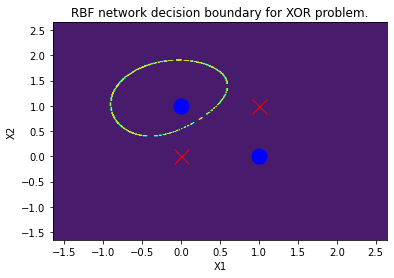

In [36]:
# demonstrate the xor plot
Spread = 0.55
step_size = 0.005
meshsteps = np.linspace(start=np.min(X)-3*Spread, stop=np.max(X)+3*Spread, num=400, retstep=False)

x1, x2 = np.meshgrid(meshsteps, meshsteps)
XX = np.array([x1.flatten(),x2.flatten()])
XX = XX.T # reshape into transpose which is python format for neural networks

# predict the model
Y = net.predict(XX)
Y.shape
Y = Y.reshape(400, 400)

# find the decision boundary of the model
decision_criteria = (max(Y.flatten()) - min(Y.flatten())) / 2
decision_boundary = (Y >= decision_criteria - step_size) * (Y <= decision_criteria + step_size)

# show the results
plt.figure()

#plot the contours of the decision boundary
plt.contourf(x1, x2, decision_boundary)

# plot XOR points
plt.plot(0, 0, 'rx', markersize=15)
plt.plot(1 ,1, 'rx', markersize=15)
plt.plot(0, 1, 'bo', markersize=15)
plt.plot(1, 0, 'bo', markersize=15)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('RBF network decision boundary for XOR problem.');